## Daniels kod för Keith Galli's pandas data science youtube film

https://www.youtube.com/watch?v=eMOA1pPVUc4

### Sales analysis

#### Import libraries

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt

In [2]:
#df = pd.read_csv("./SalesAnalysis/Sales_Data/Sales_April_2019.csv")

files = [file for file in os.listdir('./SalesAnalysis/Sales_Data')] # <== Vad gör brackets'arna? Vad är det för en data container typ?

all_months_data = pd.DataFrame() # preallocation of dataframe


for file in files:
    df = pd.read_csv("./SalesAnalysis/Sales_Data/"+file) #reads into dataframe
    all_months_data = pd.concat([all_months_data, df]) # varför square bracket?
    
#all_months_data.head()
all_months_data.to_csv("all_data.csv", index=False) # utan index=False blir det en tom fil, varför?


#### Read in updated dataframe containg all data

In [3]:
all_data = pd.read_csv("all_data.csv")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


#### Cleaning data, getting rid of nan's
##### Are there any nan's? Counting them.

In [4]:
all_data.isnull().values.any() # identifierar om det finns nan's i hela dataframen

True

In [5]:
all_data.isnull().sum().sum() # räknar antalet nan's i hela dataframen

3270

#### Drop rows of nan's

In [6]:
nan_df = all_data[all_data.isna().any(axis=1)] #Satckoverflow https://stackoverflow.com/questions/43424199/display-rows-with-one-or-more-nan-values-in-pandas-dataframe
nan_df.head(10)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN
1571,NaN,NaN,NaN,NaN,NaN,NaN
1992,NaN,NaN,NaN,NaN,NaN,NaN
2265,NaN,NaN,NaN,NaN,NaN,NaN
2798,NaN,NaN,NaN,NaN,NaN,NaN
3024,NaN,NaN,NaN,NaN,NaN,NaN


#### Daniels egna försök att ta bort rader med nan's

In [7]:
all_data = all_data.dropna(how='all') # how: default är 'ny'. 'all' ger samma resultat i detta fallet
all_data.isnull().sum().sum() # räknar antalet nan's i hela dataframen

0

#### kollar i datan vad som är "Or" i "Order Date"

In [8]:
temp_df = all_data[all_data['Order Date'].str[0:2] == 'Or']
temp_df.head(15)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2878,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2893,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
3036,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
3209,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
3618,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
4138,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
4645,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


### Remove all rows in all_data som har "Or" som de två första o "Order Date". This by doing same thing as above but using "not equal to" instead.

In [9]:
all_data = all_data[all_data['Order Date'].str[0:2] != 'Or']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


#### Adding a month column to data frame

In [10]:
all_data['Month'] = all_data['Order Date'].str[0:2]
all_data['Month'] = all_data['Month'].astype('int32')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


In [11]:
type(all_data)

pandas.core.frame.DataFrame

#### Convert to correct type

In [12]:
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered']) # to int
all_data['Price Each'] = pd.to_numeric(all_data['Price Each']) # to float

#### Which month was best wrt sales value? How much was earned?

#### Add column with total sales value per transaction

In [13]:
all_data['Sales'] = (all_data['Quantity Ordered']) * (all_data['Price Each'])
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


#### Försöker summera totala försäljningsvärdet

In [43]:
total_sales = all_data['Sales'].sum()
print(total_sales)

34492035.97


#### Försäljning per månad

In [44]:
results = all_data.groupby('Month').sum()
all_data.groupby('Month').sum()

,Quantity Ordered,Price Each,Sales,Hour,Minute
Month,,,,,
1,10903,1.811768e+06,1.822257e+06,139485,282440
2,13449,2.188885e+06,2.202022e+06,172669,354885
3,17005,2.791208e+06,2.807100e+06,218969,447559
4,20558,3.367671e+06,3.390670e+06,262259,544186
5,18667,3.135125e+06,3.152607e+06,238780,487899
6,15253,2.562026e+06,2.577802e+06,195528,402436
7,16072,2.632540e+06,2.647776e+06,206169,417349
8,13448,2.230345e+06,2.244468e+06,172289,353857
9,13109,2.084992e+06,2.097560e+06,168513,341698


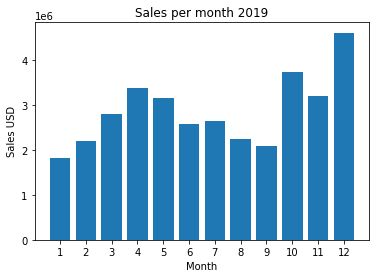

In [15]:
months = range(1,13)

plt.bar(months, results['Sales'])
plt.xticks(months)
plt.xlabel('Month')
plt.ylabel('Sales USD')
plt.title('Sales per month 2019')
plt.show()

#### What city had the most sales?
##### Mitt försök (problemet är att det finns två Portland, ett o Maine och ett o Oregon.)
##### Python string concationation: https://www.w3schools.com/python/gloss_python_string_concatenation.asp

In [16]:
new_df = all_data['Purchase Address'].str.split(", ", expand=True)
new_state_df = new_df[2].str.split(expand = True)

all_data['City'] = new_df[1]
all_data['State'] = new_state_df[0]
all_data['City+State'] = all_data['City']+ ", " + all_data['State']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,State,City+State
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas,TX,"Dallas, TX"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston,MA,"Boston, MA"
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,CA,"Los Angeles, CA"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,CA,"Los Angeles, CA"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles,CA,"Los Angeles, CA"


In [17]:
results = all_data.groupby('City+State').sum() #results är en dataframe
results.head(15)

,Quantity Ordered,Price Each,Month,Sales
City+State,,,,
"Atlanta, GA",16602,2.779908e+06,104794,2.795499e+06
"Austin, TX",11153,1.809874e+06,69829,1.819582e+06
"Boston, MA",22528,3.637410e+06,141112,3.661642e+06
"Dallas, TX",16730,2.752628e+06,104620,2.767975e+06
"Los Angeles, CA",33289,5.421435e+06,208325,5.452571e+06
"New York City, NY",27932,4.635371e+06,175741,4.664317e+06
"Portland, ME",2750,4.471893e+05,17144,4.497583e+05
"Portland, OR",11303,1.860558e+06,70621,1.870732e+06
"San Francisco, CA",50239,8.211462e+06,315520,8.262204e+06


##### Hitta alla unika värden i en kolumn:
##### https://chrisalbon.com/python/data_wrangling/pandas_list_unique_values_in_column/
##### Sortera alfabetiskt:
##### https://stackoverflow.com/questions/37857613/sort-list-of-strings-alphabetically
##### How to rotate xticks:
##### https://matplotlib.org/3.1.1/gallery/ticks_and_spines/ticklabels_rotation.html

['Atlanta, GA', 'Austin, TX', 'Boston, MA', 'Dallas, TX', 'Los Angeles, CA', 'New York City, NY', 'Portland, ME', 'Portland, OR', 'San Francisco, CA', 'Seattle, WA']


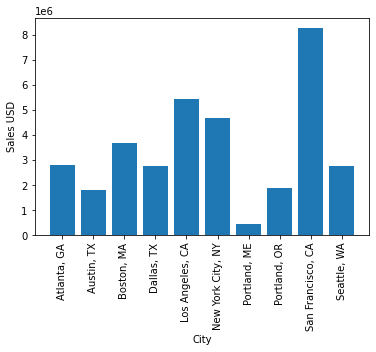

In [18]:
#cities = sorted(all_data['City+State'].unique())
cities = [city for city, df in all_data.groupby(['City+State'])]
print(cities)
plt.xticks(rotation ='vertical')
#plt.xticks(rotation =45)
plt.bar(cities, results['Sales'])
plt.ylabel('Sales USD')
plt.xlabel('City')
plt.show()

#### Keith gör ungefär samma men med .apply och Lambda function (ca 38:00 min)
##### https://www.w3schools.com/python/python_lambda.asp
##### Syntax: lambda arguments : expression

In [19]:
all_data['City 2'] = all_data['Purchase Address'].apply(lambda x : x.split(',')[1])
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,State,City+State,City 2
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas,TX,"Dallas, TX",Dallas
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston,MA,"Boston, MA",Boston
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,CA,"Los Angeles, CA",Los Angeles
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,CA,"Los Angeles, CA",Los Angeles
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles,CA,"Los Angeles, CA",Los Angeles


#### Keith använder funktioner:
#### Samt tar bort zip code ur state. Samt använder f-string

In [20]:
def get_city(adress):
    return adress.split(',')[1]

def get_state(adress):
    return adress.split(',')[2].split(' ')[1]


all_data['City 3'] = all_data['Purchase Address'].apply(lambda x: get_city(x))
all_data['State 2'] = all_data['Purchase Address'].apply(lambda x: get_state(x))
all_data['City+State2'] = all_data['Purchase Address'].apply(lambda x: f'{get_city(x)} ({get_state(x)})')

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,State,City+State,City 2,City 3,State 2,City+State2
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas,TX,"Dallas, TX",Dallas,Dallas,TX,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston,MA,"Boston, MA",Boston,Boston,MA,Boston (MA)
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,CA,"Los Angeles, CA",Los Angeles,Los Angeles,CA,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,CA,"Los Angeles, CA",Los Angeles,Los Angeles,CA,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles,CA,"Los Angeles, CA",Los Angeles,Los Angeles,CA,Los Angeles (CA)


#### Tar bort en del kolumner
#### drop: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html
#### Namnger kolumner med nytt namn:
#### rename: https://stackoverflow.com/questions/11346283/renaming-columns-in-pandas

In [21]:
all_data = all_data.drop(columns = ["City+State","City 2", "City 3", "State 2","City","State"])
all_data.rename(columns = {'City+State2' : 'City'}, inplace=True) # använd "inplace" då det är en existerande dataframe
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)


### Testar själv med datetime:

In [22]:
from datetime import datetime

date_str = '04/07/19 22:30' #samma format som i datan

date_month = datetime.strptime(date_str, '%m/%d/%y %H:%M')
#date_all = datetime.datetime.strptime(date_str, '%m/%d/%y')

print(date_month)
#print(date_all)


2019-04-07 22:30:00


#### Provar att addera en egen kolumn med order date på datetime format
##### Mitt förslag nedan

In [23]:
# Mitt förslag som inte funkar
#all_data['Order Date'] = datetime.strptime(all_data['Order Date'], '%m/%d/%y %H:%M')
# Keith's förslag
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)


In [24]:
all_data['Hour'] = all_data['Order Date'].dt.hour
all_data['Minute'] = all_data['Order Date'].dt.minute
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9,27


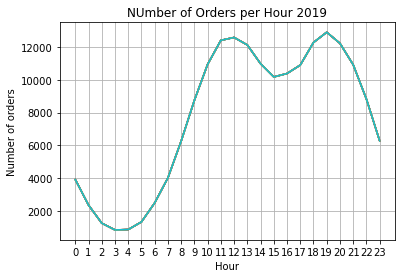

In [51]:
hours = [hour for hour, df in all_data.groupby('Hour')]
# hours = range(0,24)
plt.plot(hours, all_data.groupby(['Hour']).count())
plt.xticks(hours)
plt.grid()
plt.xlabel('Hour')
plt.ylabel('Number of orders')
plt.title('NUmber of Orders per Hour 2019')
plt.show()

# plt.plot(hours, all_data.groupby(['Hour']).sum())

# all_data.groupby(['Hour']).count()
# all_data.groupby(['Hour']).sum()



### Hur kan jag tex ta fram samma data men uppdelat per månad istället för hela året? Eller uppdelat per city?

#### Which products are sold together most often?

In [ ]:
df = all_data(all_data['Order ID']).duplicated(keep=false)

In [26]:
date = pd.Timestamp.now()
print(date)
print(date.hour)

2020-07-31 05:54:16.373902
5
